# Instalando as bibliotecas

In [2]:
!python.exe -m pip install --upgrade pip

In [3]:
!pip install pandas
!pip install fastparquet
!pip install matplotlib
!pip install seaborn

# Início do teste

In [4]:
#Importando a biblioteca pandas
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
#Carregando o arquivo vendas.csv
df = pd.read_csv("vendas.csv")

In [6]:
#Vendo as colunas e primeiras linhas do Dataframe
df.head()

,id_venda,data_venda,id_cliente,nome_cliente,produto,categoria,quantidade,preco_unitario,preco_total
0,1,2023-01-15,1001,Ana Silva,Camiseta,Moda,2,50.0,100.0
1,2,2023-01-16,1002,Bruno Santos,Calça,Moda,1,80.0,80.0
2,3,2023-01-17,1003,Carlos Oliveira,Tênis,Esportes,1,120.0,120.0
3,4,2023-02-01,1004,Diana Costa,Bola de Futebol,Esportes,3,30.0,90.0
4,5,2023-02-05,1005,Edson Pereira,Notebook,Eletrônicos,1,2500.0,2500.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_venda        20 non-null     int64  
 1   data_venda      20 non-null     object 
 2   id_cliente      20 non-null     int64  
 3   nome_cliente    20 non-null     object 
 4   produto         20 non-null     object 
 5   categoria       20 non-null     object 
 6   quantidade      20 non-null     int64  
 7   preco_unitario  20 non-null     float64
 8   preco_total     20 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.5+ KB


In [8]:
#Convertendo o tipo da coluna data_venda de object para datetime
df["data_venda"] = pd.to_datetime(df["data_venda"], errors = "coerce")

In [9]:
df.dtypes

id_venda                   int64
data_venda        datetime64[ns]
id_cliente                 int64
nome_cliente              object
produto                   object
categoria                 object
quantidade                 int64
preco_unitario           float64
preco_total              float64
dtype: object

In [10]:
#Analisando se há dados nulos
df.isnull().sum()

id_venda          0
data_venda        0
id_cliente        0
nome_cliente      0
produto           0
categoria         0
quantidade        0
preco_unitario    0
preco_total       0
dtype: int64

In [11]:
#Analisando se há dados duplicados
df.duplicated().sum()

np.int64(0)

In [12]:
#Conclusão: como não há dados nulos e duplicados não foi necessário fazer tratamentos.

In [13]:
#Vendo todas as linhas do Dataframe
df.head(25)

,id_venda,data_venda,id_cliente,nome_cliente,produto,categoria,quantidade,preco_unitario,preco_total
0,1,2023-01-15,1001,Ana Silva,Camiseta,Moda,2,50.0,100.0
1,2,2023-01-16,1002,Bruno Santos,Calça,Moda,1,80.0,80.0
2,3,2023-01-17,1003,Carlos Oliveira,Tênis,Esportes,1,120.0,120.0
3,4,2023-02-01,1004,Diana Costa,Bola de Futebol,Esportes,3,30.0,90.0
4,5,2023-02-05,1005,Edson Pereira,Notebook,Eletrônicos,1,2500.0,2500.0
5,6,2023-02-10,1006,Fernanda Lima,Smartphone,Eletrônicos,2,1500.0,3000.0
6,7,2023-02-15,1007,Gustavo Souza,Livro,Entretenimento,5,40.0,200.0
7,8,2023-02-20,1008,Heloisa Fernandes,Tablet,Eletrônicos,1,800.0,800.0
8,9,2023-02-25,1009,Ivan Rodrigues,Câmera,Eletrônicos,1,1200.0,1200.0
9,10,2023-03-01,1010,Joana Mendes,Fone de Ouvido,Eletrônicos,4,150.0,600.0


In [14]:
#Salvando o arquivo em formato Parquet
df.to_parquet("vendas_tratadas.parquet", index=False)

In [15]:
#Lendo base de dados tratada para teste
df_tratado = pd.read_parquet("vendas_tratadas.parquet")

In [16]:
df_tratado.head(25)

,id_venda,data_venda,id_cliente,nome_cliente,produto,categoria,quantidade,preco_unitario,preco_total
0,1,2023-01-15,1001,Ana Silva,Camiseta,Moda,2,50.0,100.0
1,2,2023-01-16,1002,Bruno Santos,Calça,Moda,1,80.0,80.0
2,3,2023-01-17,1003,Carlos Oliveira,Tênis,Esportes,1,120.0,120.0
3,4,2023-02-01,1004,Diana Costa,Bola de Futebol,Esportes,3,30.0,90.0
4,5,2023-02-05,1005,Edson Pereira,Notebook,Eletrônicos,1,2500.0,2500.0
5,6,2023-02-10,1006,Fernanda Lima,Smartphone,Eletrônicos,2,1500.0,3000.0
6,7,2023-02-15,1007,Gustavo Souza,Livro,Entretenimento,5,40.0,200.0
7,8,2023-02-20,1008,Heloisa Fernandes,Tablet,Eletrônicos,1,800.0,800.0
8,9,2023-02-25,1009,Ivan Rodrigues,Câmera,Eletrônicos,1,1200.0,1200.0
9,10,2023-03-01,1010,Joana Mendes,Fone de Ouvido,Eletrônicos,4,150.0,600.0


In [17]:
df_tratado.dtypes

id_venda                   int64
data_venda        datetime64[ns]
id_cliente                 int64
nome_cliente              object
produto                   object
categoria                 object
quantidade                 int64
preco_unitario           float64
preco_total              float64
dtype: object

# Começando as análises

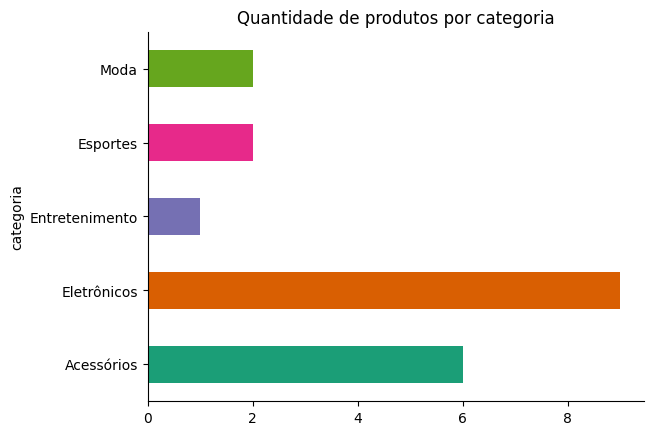

In [18]:
#Quantidade de produtos por categoria.
df.groupby('categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title("Quantidade de produtos por categoria")
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
#Conclusão do gráfico acima: A partir dos dados acima conseguimos analisar a quantidade de vendas por categoria.

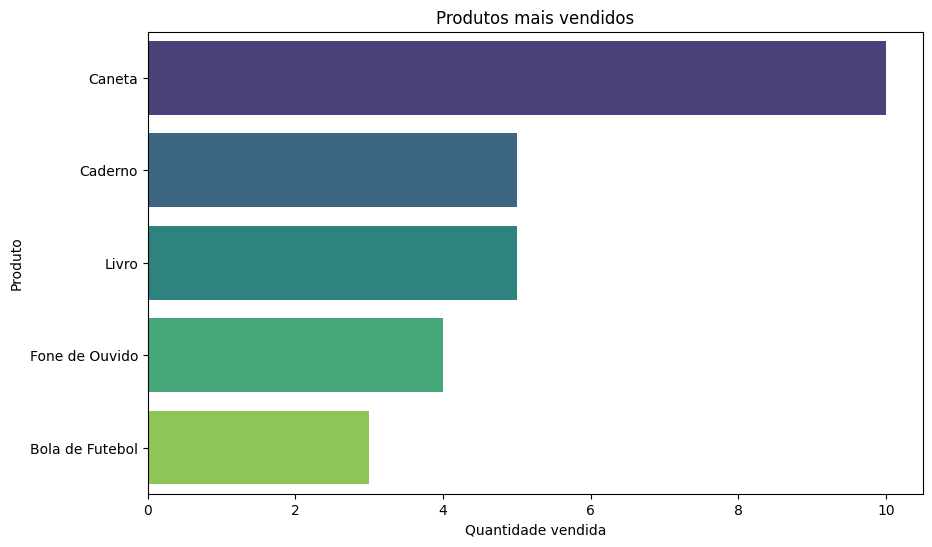

In [20]:
# Agrupando por produto para verificar a quantidade total vendida dos top 5 produtos mais vendidos.
produtos_mais_vendidos = df.groupby('produto')['quantidade'].sum().sort_values(ascending=False).head(5)

# Visualizar os produtos mais vendidos
plt.figure(figsize=(10,6))
sns.barplot(x=produtos_mais_vendidos.values, y=produtos_mais_vendidos.index, hue=produtos_mais_vendidos.index, palette='viridis', legend=False)
plt.title('Produtos mais vendidos')
plt.xlabel('Quantidade vendida')
plt.ylabel('Produto')
plt.show()

In [21]:
#Conclusão: A partir do gráfico acima foi possível analisar os top 5 produtos mais vendidos.

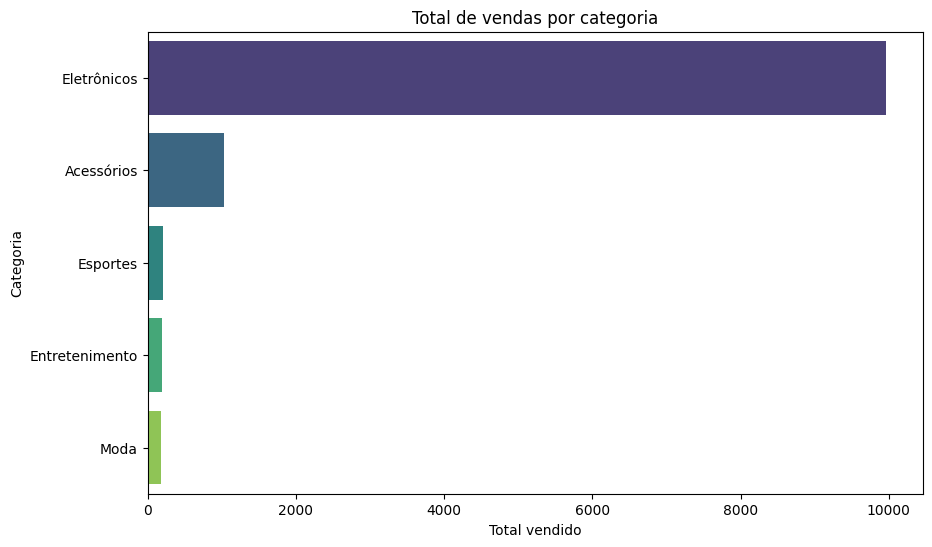

In [22]:
#Total de vendas totais por categoria.
categorias_mais_vendidas = df.groupby('categoria')['preco_total'].sum().sort_values(ascending=False)

# Visualizar os produtos mais vendidos
plt.figure(figsize=(10,6))
sns.barplot(x=categorias_mais_vendidas.values, y=categorias_mais_vendidas.index, hue=categorias_mais_vendidas.index, palette='viridis', legend=False)
plt.title('Total de vendas por categoria')
plt.xlabel('Total vendido')
plt.ylabel('Categoria')
plt.show()

In [23]:
#Conclusão: A partir do gráfico conseguimos analisar as vendas totais por categoria.

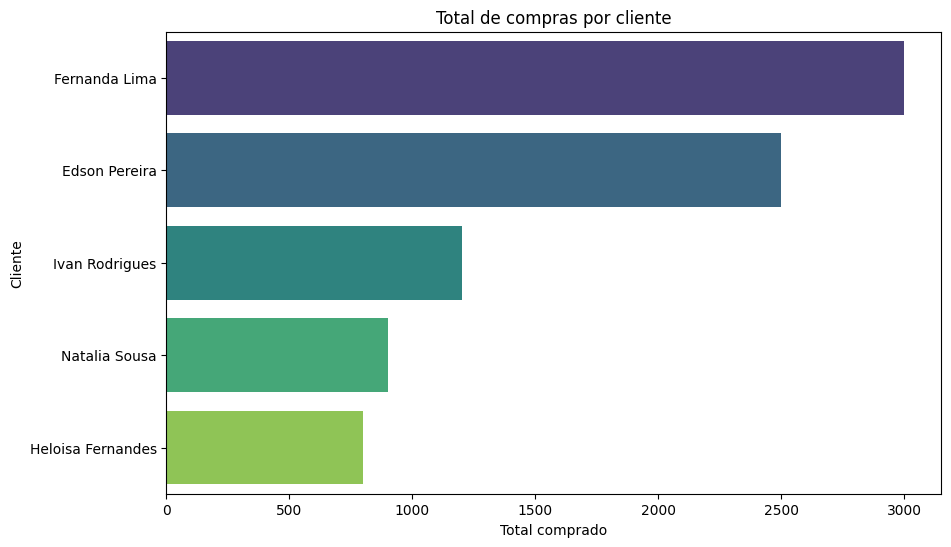

In [24]:
# Top 5 de clientes que mais compraram.
cliente_mais_comprou = df.groupby('nome_cliente')['preco_total'].sum().sort_values(ascending=False).head(5)

# Visualizar os produtos mais vendidos
plt.figure(figsize=(10,6))
sns.barplot(x=cliente_mais_comprou.values, y=cliente_mais_comprou.index, hue=cliente_mais_comprou.index, palette='viridis', legend=False)
plt.title('Total de compras por cliente')
plt.xlabel('Total comprado')
plt.ylabel('Cliente')
plt.show()

In [25]:
#Conclusão: A partir do gráfico acima conseguimos analisar os top 5 clientes que mais compraram.

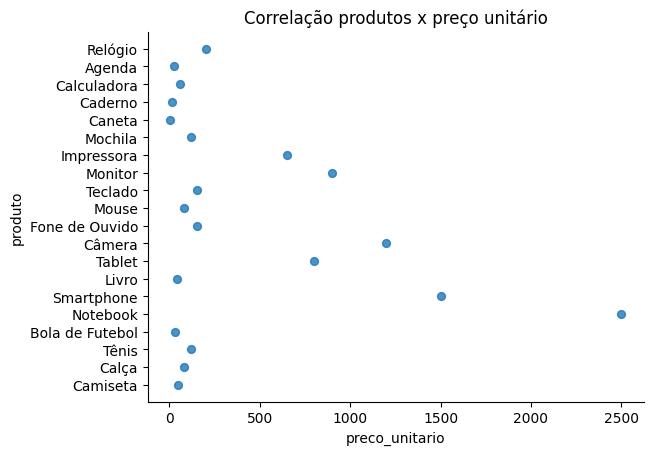

In [26]:
#Correlação dos produtos e o seus preços unitários.
df.plot(kind='scatter', x='preco_unitario', y='produto', s=32, alpha=.8)
plt.title('Correlação produtos x preço unitário')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
#Conclusão: A partir do gráfico acima foi possível analisar que grande parte dos produtos estão abaixo da linha de 500,00 formando
#a linha de tendência. Consigo também analisar os outliers que fogem dessa tendência.

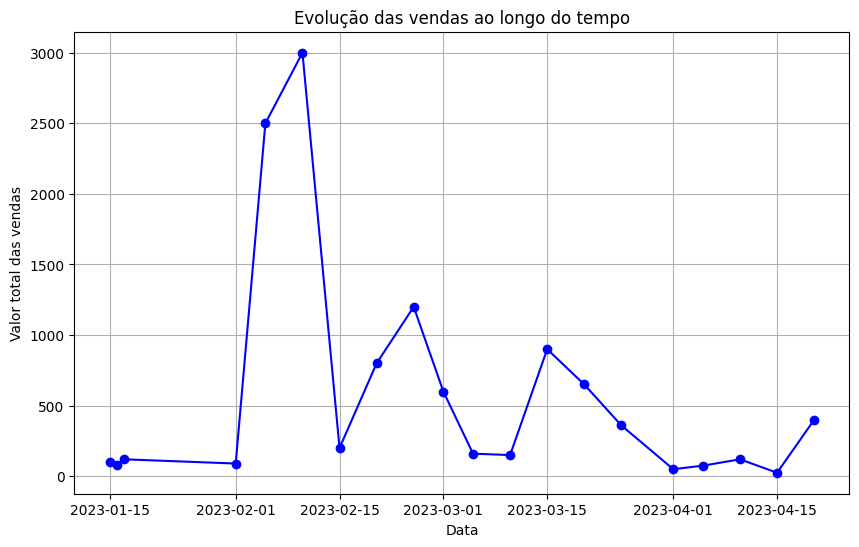

In [28]:
# Agrupando por data para somar os valores de venda
vendas_por_data = df.groupby('data_venda')['preco_total'].sum()

# Visualizar a evolução das vendas ao longo do tempo
plt.figure(figsize=(10,6))
plt.plot(vendas_por_data.index, vendas_por_data.values, marker='o', color='b')
plt.title('Evolução das vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor total das vendas')
plt.grid(True)
plt.show()

In [29]:
#Conclusão: A partir do gráfico acima foi possível identificar a série de vendas e o total das vendas durante o tempo.

# Avançando nos estudos

## Após as análises acima tomei a liberdade de estudar um pouco sobre modelos de previsão, pois entendi ser algo relevante ao produto da Infradata

### Interpolação e Modelo de previsão ARIMA

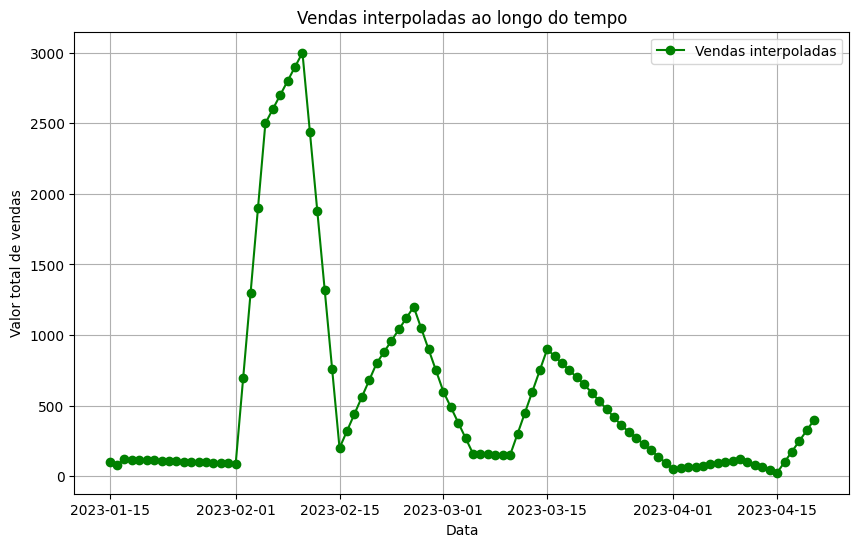

In [30]:
# Agrupando os dados por data e somando os valores de venda
vendas_por_data = df.groupby('data_venda')['preco_total'].sum()

# Criando um range completo de datas (mesmo para as datas faltantes)
vendas_por_data = vendas_por_data.asfreq('D')

# Visualizando os dados com valores nulos (dias sem vendas)
vendas_por_data.isnull().sum()

# Interpolando os valores nulos (dias sem vendas) usando interpolação linear
vendas_interpoladas = vendas_por_data.interpolate(method='linear')

# Visualizando as vendas interpoladas
plt.figure(figsize=(10,6))
plt.plot(vendas_interpoladas.index, vendas_interpoladas.values, marker='o', color='green', label='Vendas interpoladas')
plt.title('Vendas interpoladas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor total de vendas')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
#Tomei a liberdade de estudar um pouco sobre o tema interpolação e entendi ser relevante para o produto da Infradata visto que trabalhamos analisando
#séries de vendas temporais e buscando prever o futuro.
#Consigo concluir através desse gráfico quais são as outras possíveis vendas dentro da série temporal já conhecida.

In [32]:
!pip install statsmodels

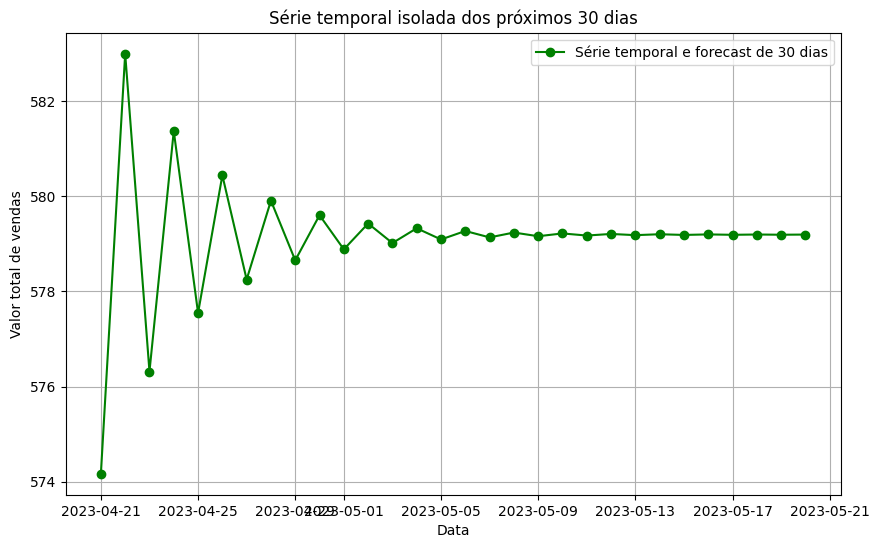

In [33]:
#Série temporal isolada dos próximos 30 dias
from statsmodels.tsa.arima.model import ARIMA
vendas_por_data_forecast = df.groupby('data_venda')['preco_total'].sum()

vendas_por_data_forecast = vendas_por_data_forecast.asfreq('D')

modelo = ARIMA(vendas_por_data_forecast, order=(1, 0, 1))
modelo_fit = modelo.fit()

# Previsão
previsao = modelo_fit.forecast(steps=30)

plt.figure(figsize=(10,6))
plt.plot(previsao.index, previsao.values, marker='o', color='green', label='Série temporal e forecast de 30 dias')
plt.title('Série temporal isolada dos próximos 30 dias')
plt.xlabel('Data')
plt.ylabel('Valor total de vendas')
plt.legend()
plt.grid(True)
plt.show()

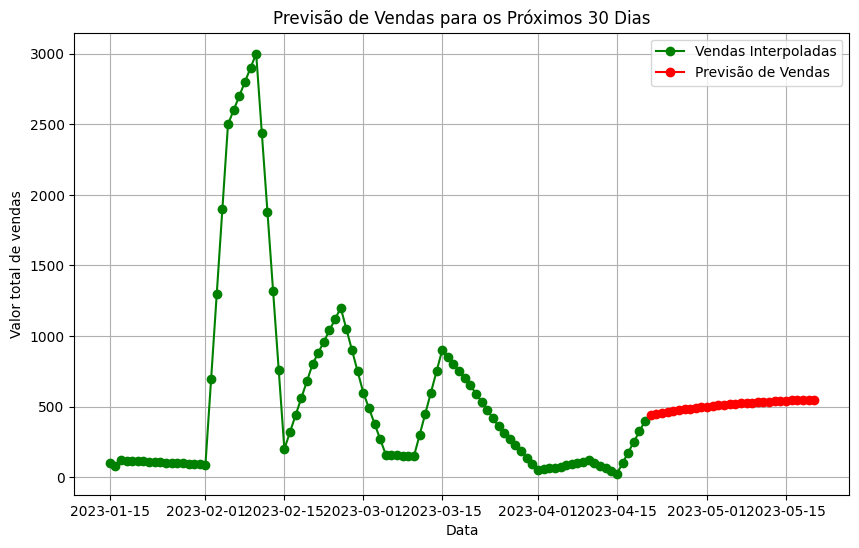

In [34]:
#Previsão de vendas para os próximos 30 dias.
model = ARIMA(vendas_interpoladas, order=(1, 0, 1))
model_fit = model.fit()

# Prevendo os próximos 30 dias
forecast = model_fit.forecast(steps=30)

# Criando um índice de datas para os próximos 30 dias
future_dates = pd.date_range(start=vendas_interpoladas.index[-1] + pd.Timedelta(days=1), periods=30)

# Criando uma série temporal para as previsões
previsao_vendas = pd.Series(forecast, index=future_dates)

# Visualizando as vendas interpoladas e a previsão
plt.figure(figsize=(10, 6))
plt.plot(vendas_interpoladas.index, vendas_interpoladas.values, marker='o', color='green', label='Vendas Interpoladas')
plt.plot(previsao_vendas.index, previsao_vendas.values, marker='o', color='red', label='Previsão de Vendas')
plt.title('Previsão de Vendas para os Próximos 30 Dias')
plt.xlabel('Data')
plt.ylabel('Valor total de vendas')
plt.legend()
plt.grid(True)
plt.show()

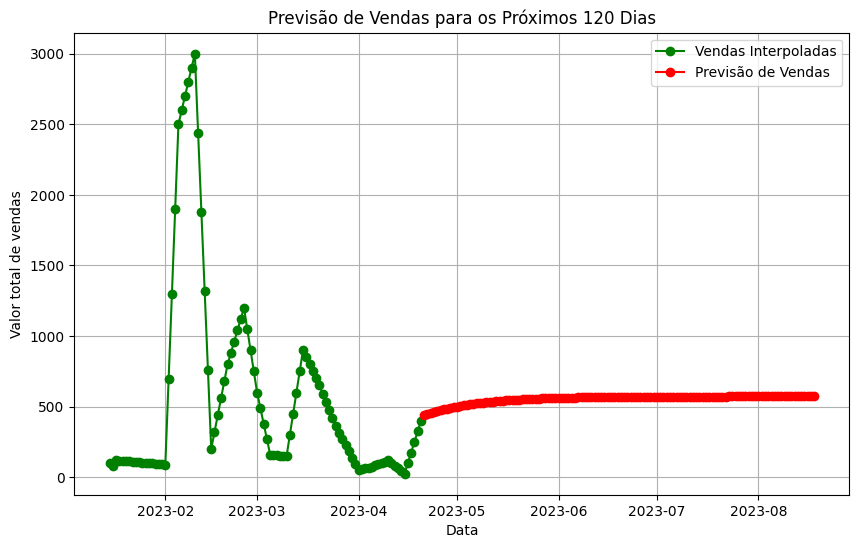

In [35]:
#Previsão de vendas dos próximos 120 dias
model = ARIMA(vendas_interpoladas, order=(1, 0, 1))
model_fit = model.fit()

# Prevendo os próximos 120 dias
forecast = model_fit.forecast(steps=120)

# Criando um índice de datas para os próximos 120 dias
datas_futuras = pd.date_range(start=vendas_interpoladas.index[-1] + pd.Timedelta(days=1), periods=120)

# Criando uma série temporal para as previsões
previsao_vendas = pd.Series(forecast, index=datas_futuras)

# Visualizando as vendas interpoladas e a previsão
plt.figure(figsize=(10, 6))
plt.plot(vendas_interpoladas.index, vendas_interpoladas.values, marker='o', color='green', label='Vendas Interpoladas')
plt.plot(previsao_vendas.index, previsao_vendas.values, marker='o', color='red', label='Previsão de Vendas')
plt.title('Previsão de Vendas para os Próximos 120 Dias')
plt.xlabel('Data')
plt.ylabel('Valor total de vendas')
plt.legend()
plt.grid(True)
plt.show()